In [4]:
# source: https://www.kaggle.com/pankaj1234/tensorflow-gradient-tape/data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from parameterizedcnn import ParameterizedCNN 

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
import sys

In [3]:
from tensorflow.keras.layers import Input, BatchNormalization, Conv2D, MaxPooling2D, Dense, Flatten, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.models import Model

In [5]:
class ParameterizedCNN:
    default_parameters = {"filters":[16,32,64], "filter_size":[3,3,3], "pool_size":[2,2,2],"padding": ["same","same","same"], "drop_out":[0.3,0.4,0.5],"dense":256}
    @staticmethod
    def generate_model(input_shape, hyperparameters=default_parameters, classes=2):
        chanDim = -1
        input_layer = Input(shape=input_shape)
        x=input_layer
        
        loop_i=0
        # loop to build CNN layers for the model
        for f in hyperparameters["filters"]:
            fs = hyperparameters["filter_size"][loop_i]
            ps = hyperparameters["pool_size"][loop_i]
            png = hyperparameters["padding"][loop_i]
            drpot = hyperparameters["drop_out"][loop_i]
            x=Conv2D(f,(fs,fs),padding=png)(x)
            x=Activation("relu")(x)
            x=BatchNormalization(axis=chanDim)(x)
            x=Dropout(drpot)(x)
            x=MaxPooling2D(pool_size=(ps,ps))(x)
            loop_i+=1
        
        # Dense Layer 1
        x = Flatten()(x)
        x = Dense(hyperparameters["dense"])(x)
        x = Activation("relu")(x)
        x = BatchNormalization()(x)
        x = Dropout(hyperparameters["drop_out"][0])(x)
        
        x = Dense(classes)(x)
        result = Activation("softmax")(x)
        
        model = Model(input_layer,result, name="ParameterizedCNN")
        
        return model

In [6]:
def step_function(X,y):
    with tf.GradientTape() as tape:
        pred = model(X)
        loss = categorical_crossentropy(y, pred)
        
        grads=tape.gradient(loss, model.trainable_variables)
        opt.apply_gradients(zip(grads, model.trainable_variables))

In [7]:
EPOCHS = 25
BS = 64
INIT_LR = 1e-3

# model parameters
default_parameters = {"filters":[16,32,64], "filter_size":[3,3,3], "pool_size":[2,2,2],"padding": ["same","same","same"], "drop_out":[0.3,0.4,0.5],"dense":256}
img_shape = (28,28,1)
mnist_classes = 10

model = ParameterizedCNN.generate_model(input_shape=img_shape, hyperparameters = default_parameters, classes=mnist_classes)

opt = Adam(lr=INIT_LR, decay=INIT_LR/EPOCHS)
model.summary()

Model: "ParameterizedCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 16)        64        
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)   

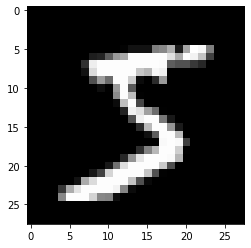

In [10]:
mtrain = pd.read_csv("mnist_train.csv")
mtest = pd.read_csv("mnist_test.csv")
mnist_train = np.array(mtrain)
mnist_test = np.array(mtest)
mnist_train_label = mnist_train[:,0]
mnist_test_label = mnist_test[:,0]
mnist_train = mnist_train[:,1:]
mnist_test = mnist_test[:,1:]
mnist_train=mnist_train.reshape(60000,28,28,1)
mnist_train = mnist_train.astype("float32")/255.0
mnist_test=mnist_test.reshape(10000,28,28,1)
mnist_test = mnist_test.astype("float32")/255.0


plt.imshow(mnist_train[0].reshape(28,28), cmap='gray')
mnist_train_label = to_categorical(mnist_train_label)
mnist_test_label = to_categorical(mnist_test_label)

In [14]:
# TODO
mnist_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [16]:
# TODO
mnist_test[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

In [11]:
updates = int(len(mnist_train)/BS)
for i in range(0, updates):
    start = i * BS
    end = start + BS
    
    step_function(mnist_train[start:end], mnist_train_label[start:end])

In [12]:
model.compile(optimizer=opt, loss=categorical_crossentropy,	metrics=["acc"])

(loss, acc) = model.evaluate(mnist_test, mnist_test_label)
print("Model accuracy : {:.4f}".format(acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.0808 - acc: 0.9732
Model accuracy : 0.9732
